In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('bank-full.csv',delimiter = ';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
data = data[['age','balance','housing','loan','campaign','pdays','previous','poutcome','y']]
data

,age,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,2143,yes,no,1,-1,0,unknown,no
1,44,29,yes,no,1,-1,0,unknown,no
2,33,2,yes,yes,1,-1,0,unknown,no
3,47,1506,yes,no,1,-1,0,unknown,no
4,33,1,no,no,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...
45206,51,825,no,no,3,-1,0,unknown,yes
45207,71,1729,no,no,2,-1,0,unknown,yes
45208,72,5715,no,no,5,184,3,success,yes
45209,57,668,no,no,4,-1,0,unknown,no


In [4]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
g = ['housing','loan','poutcome','y']
for i in g:
    data[i] = label.fit_transform(data[i])
data

,age,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,2143,1,0,1,-1,0,3,0
1,44,29,1,0,1,-1,0,3,0
2,33,2,1,1,1,-1,0,3,0
3,47,1506,1,0,1,-1,0,3,0
4,33,1,0,0,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...
45206,51,825,0,0,3,-1,0,3,1
45207,71,1729,0,0,2,-1,0,3,1
45208,72,5715,0,0,5,184,3,2,1
45209,57,668,0,0,4,-1,0,3,0


In [5]:
data.pdays.replace(-1,0)

0          0
1          0
2          0
3          0
4          0
        ... 
45206      0
45207      0
45208    184
45209      0
45210    188
Name: pdays, Length: 45211, dtype: int64

In [6]:
x = data.drop("y",axis=1)
y = data.y
x

,age,balance,housing,loan,campaign,pdays,previous,poutcome
0,58,2143,1,0,1,-1,0,3
1,44,29,1,0,1,-1,0,3
2,33,2,1,1,1,-1,0,3
3,47,1506,1,0,1,-1,0,3
4,33,1,0,0,1,-1,0,3
...,...,...,...,...,...,...,...,...
45206,51,825,0,0,3,-1,0,3
45207,71,1729,0,0,2,-1,0,3
45208,72,5715,0,0,5,184,3,2
45209,57,668,0,0,4,-1,0,3


In [7]:
from sklearn.preprocessing import MinMaxScaler
scale  = MinMaxScaler()
for i in x.columns:
    x[i] = scale.fit_transform(x[[i]])
x

,age,balance,housing,loan,campaign,pdays,previous,poutcome
0,0.519481,0.092259,1.0,0.0,0.000000,0.000000,0.000000,1.000000
1,0.337662,0.073067,1.0,0.0,0.000000,0.000000,0.000000,1.000000
2,0.194805,0.072822,1.0,1.0,0.000000,0.000000,0.000000,1.000000
3,0.376623,0.086476,1.0,0.0,0.000000,0.000000,0.000000,1.000000
4,0.194805,0.072812,0.0,0.0,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.0,0.0,0.032258,0.000000,0.000000,1.000000
45207,0.688312,0.088501,0.0,0.0,0.016129,0.000000,0.000000,1.000000
45208,0.701299,0.124689,0.0,0.0,0.064516,0.212156,0.010909,0.666667
45209,0.506494,0.078868,0.0,0.0,0.048387,0.000000,0.000000,1.000000


In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 42,test_size=0.2)

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [10]:
pred = tree.predict(xtest)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(pred,ytest))
print(confusion_matrix(pred,ytest))
print(classification_report(pred,ytest))

0.8258321353533119
[[7184  807]
 [ 768  284]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7991
           1       0.26      0.27      0.27      1052

    accuracy                           0.83      9043
   macro avg       0.58      0.58      0.58      9043
weighted avg       0.83      0.83      0.83      9043



<AxesSubplot:>

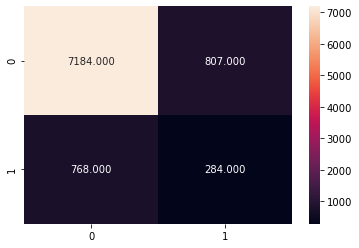

In [13]:
sns.heatmap(confusion_matrix(pred,ytest),annot = True,fmt='.3f')